/Users/griegner/git-repositories/compare-brain-maps/.pixi/envs/notebook/lib/python3.12/site-packages/neuromaps/datasets/utils.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


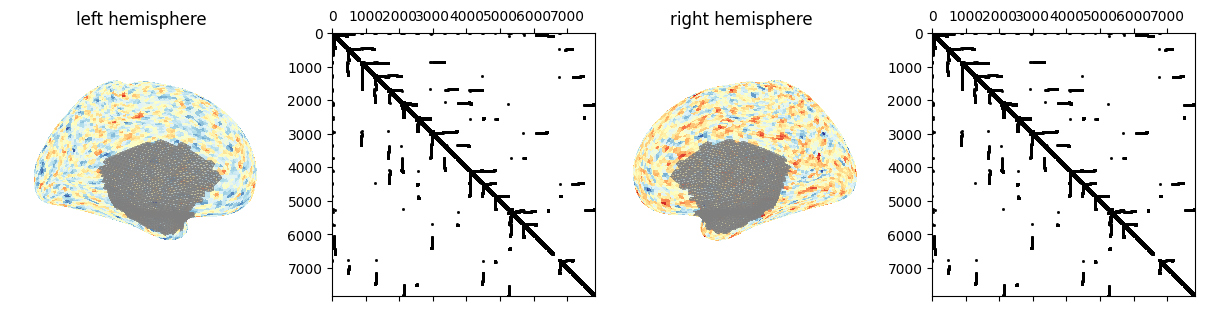

In [1]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_surf

from compare_brain_maps.utils import Surface
import numpy as np

n_vertices = 7842
data = {"left": np.random.randn(n_vertices), "right": np.random.randn(n_vertices)}
X = Surface(data, atlas="fsLR", density="8k", surface="inflated")
X_adjacency = X.get_adjacency()

# plot mask of the medial wall, and adjacency matrix
fig = plt.figure(figsize=(12, 3), layout="constrained")
axs = [
    fig.add_subplot(1, 4, 1, projection="3d"),
    fig.add_subplot(1, 4, 2),
    fig.add_subplot(1, 4, 3, projection="3d"),
    fig.add_subplot(1, 4, 4),
]
plot_surf_kwargs = dict(surf_map=X, view="medial", cmap="RdYlBu", colorbar=False, darkness=None)
_ = plot_surf(title="left hemisphere", hemi="left", axes=axs[0], **plot_surf_kwargs)
axs[1].spy(X_adjacency["left"], c="k", ms=1)
_ = plot_surf(title="right hemisphere", hemi="right", axes=axs[2], **plot_surf_kwargs)
axs[3].spy(X_adjacency["right"], c="k", ms=1)